In [2]:
import numpy as np
import pandas as pd

# numpy 소수점 4째자리까지 표현
np.set_printoptions(precision=4)

# pandas 소수점 4째자리까지 표현
# pd.set_option('display.float_format', lambda x: '%.4f' % x)

In [3]:
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing()

# print(data) # 찍어보면 feature_names 이 있어. 
# print(data.DESCR)
# 

**컬럼 소개 (California Housing Dataset)**

행의 수 : 20640 <br>
컬럼의(속성) 수 : 8 

* **MedInc**: 블록 그룹의 중간 소득
* **HouseAge**: 블록 그룹의 중간 주택 연령
* **AveRooms**: 가구당 평균 방 수
* **AveBedrms**: 가구당 평균 침실 수
* **Population**: 블록 그룹 인구
* **AveOccup**: 가구당 평균 거주자 수
* **Latitude**: 블록 그룹 위도
* **Longitude**: 블록 그룹 경도
* **MedHouseVal**: 중간 주택 가격 (타겟, $100,000 단위)

### 데이터프레임으로 만들기

In [4]:
df = pd.DataFrame(data['data'], columns=data['feature_names'])
df.head()
# df = pd.DataFrame(data = data, columns = feature_names)

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25

In [5]:
df['MedHouseVal'] = data['target']

In [6]:
df.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422

In [7]:
df.describe()

MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude   MedHouseVal  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.540000   -124.350000      0.149990  
25%        2.429741     33.930000   -121.800000      1.196000  
50%        2.818116     34.260000   -118.490000      1.797000  
75%        3.282261     37.710000   -118.010000      2.647250  
max     1243.333333     41.950000   -114.310000      5.000010

In [8]:
import folium
import branca.colormap as cm
# 위도, 경도의 평균을 중심으로 지도 생성
center = [df['Latitude'].mean(), df['Longitude'].mean()]
m = folium.Map(location=center, zoom_start=6)

# 데이터가 많으므로 일부만 샘플링하여 시각화 (예: 1000개)
sample_df = df.sample(n=1000, random_state=42)

# 가격에 따른 색상 매핑 함수 (Linear Colormap)
colormap = cm.LinearColormap(colors=['blue', 'green', 'yellow', 'red'], 
                             index=[sample_df['MedHouseVal'].min(), sample_df['MedHouseVal'].max()],
                             vmin=sample_df['MedHouseVal'].min(),
                             vmax=sample_df['MedHouseVal'].max())
colormap.caption = 'Median House Value'
colormap.add_to(m)

for idx, row in sample_df.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=5,  # 반지름은 고정 (가격과 무관)
        color=colormap(row['MedHouseVal']),
        fill=True,
        fill_color=colormap(row['MedHouseVal']),
        fill_opacity=0.7,
        tooltip=f"Price: {row['MedHouseVal']}"
    ).add_to(m)

m

In [9]:
### 데이터를 분할(train_test_split)

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop('MedHouseVal', axis=1), df['MedHouseVal'], test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((16512, 8), (4128, 8))

### 평가지표(MSE, MAE, RMSE, R2) - 회귀모델에서의 평가지표

In [11]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error, r2_score

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

my_predictions = {}

colors = ['r', 'c', 'm', 'y', 'k', 'khaki', 'teal', 'orchid', 'sandybrown',
          'greenyellow', 'dodgerblue', 'deepskyblue', 'rosybrown', 'firebrick',
          'deeppink', 'crimson', 'salmon', 'darkred', 'olivedrab', 'olive', 
          'forestgreen', 'royalblue', 'indigo', 'navy', 'mediumpurple', 'chocolate',
          'gold', 'darkorange', 'seagreen', 'turquoise', 'steelblue', 'slategray', 
          'peru', 'midnightblue', 'slateblue', 'dimgray', 'cadetblue', 'tomato'
         ]

# plot_predictions : 예측값과 실제값을 산점도로 비교하여 시각화
def plot_predictions(name_, pred, actual):
    df = pd.DataFrame({'prediction': pred, 'actual': actual})
    df = df.sort_values(by='actual').reset_index(drop=True)

    plt.figure(figsize=(12, 9))
    plt.scatter(df.index, df['prediction'], marker='x', color='r')
    plt.scatter(df.index, df['actual'], alpha=0.7, marker='o', color='black')
    plt.title(name_, fontsize=15)
    plt.legend(['prediction', 'actual'], fontsize=12)
    plt.show()

# mse 기준으로 모델의 성능 평가를 해주는 함수
def mse_eval(name_, pred, actual):
    global predictions
    global colors

    # 산점도를 그리고(예측값, 정답값)
    plot_predictions(name_, pred, actual)

    # mse 계산
    mse = mean_squared_error(pred, actual)
    my_predictions[name_] = mse

    # 모델별 성능을 비교하기 위해 sort
    y_value = sorted(my_predictions.items(), key=lambda x: x[1], reverse=True)
    
    df = pd.DataFrame(y_value, columns=['model', 'mse'])
    print(df)
    min_ = df['mse'].min() - 10
    max_ = df['mse'].max() + 10
    
    length = len(df)
    
    plt.figure(figsize=(10, length))
    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'], fontsize=15)
    bars = ax.barh(np.arange(len(df)), df['mse'])
    
    for i, v in enumerate(df['mse']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=15, fontweight='bold')
        
    plt.title('MSE Error', fontsize=18)
    plt.xlim(min_, max_)
    
    plt.show()

# 리스트에 있는 모델중 하나를 삭제하는 함수
def remove_model(name_):
    global my_predictions
    try:
        del my_predictions[name_]
    except KeyError:
        return False
    return True

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

### LinearRegression (복습)

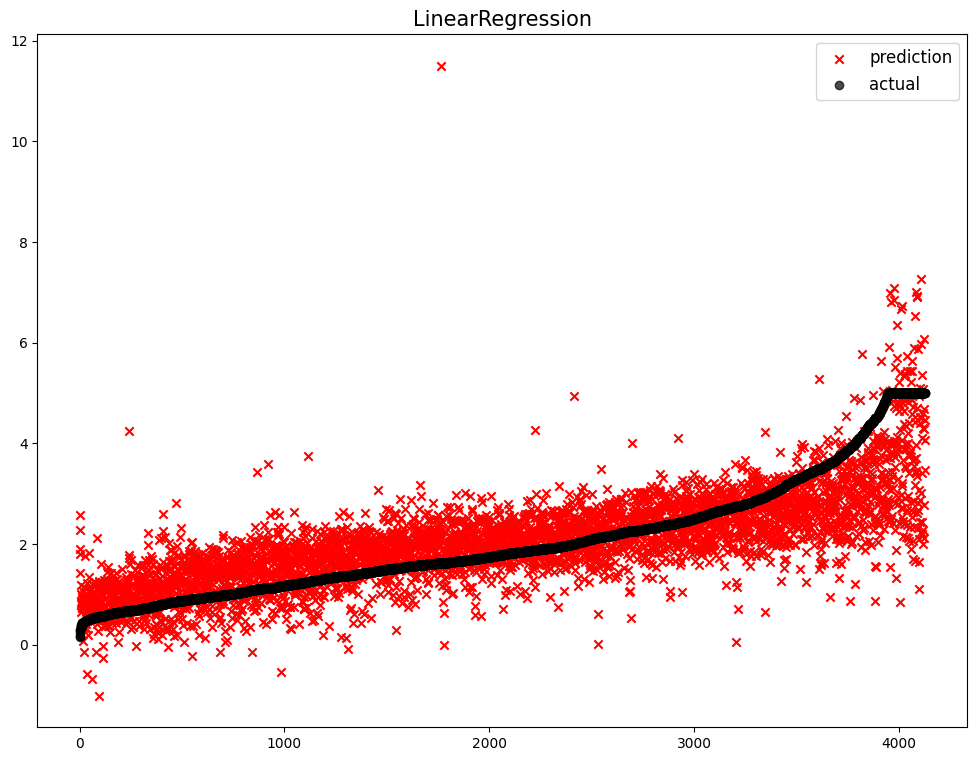

              model       mse
0  LinearRegression  0.555892


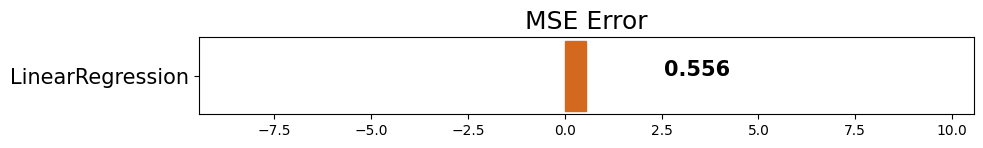

In [14]:
# 1. 모델 생성
linear_reg = LinearRegression(n_jobs=-1)

# 2. 모델 학습
linear_reg.fit(X_train, y_train)

# 3. 모델 예측
y_pred = linear_reg.predict(X_test)

# 4. 모델 평가
mse_eval('LinearRegression', y_pred, y_test)

### Ridge 모델

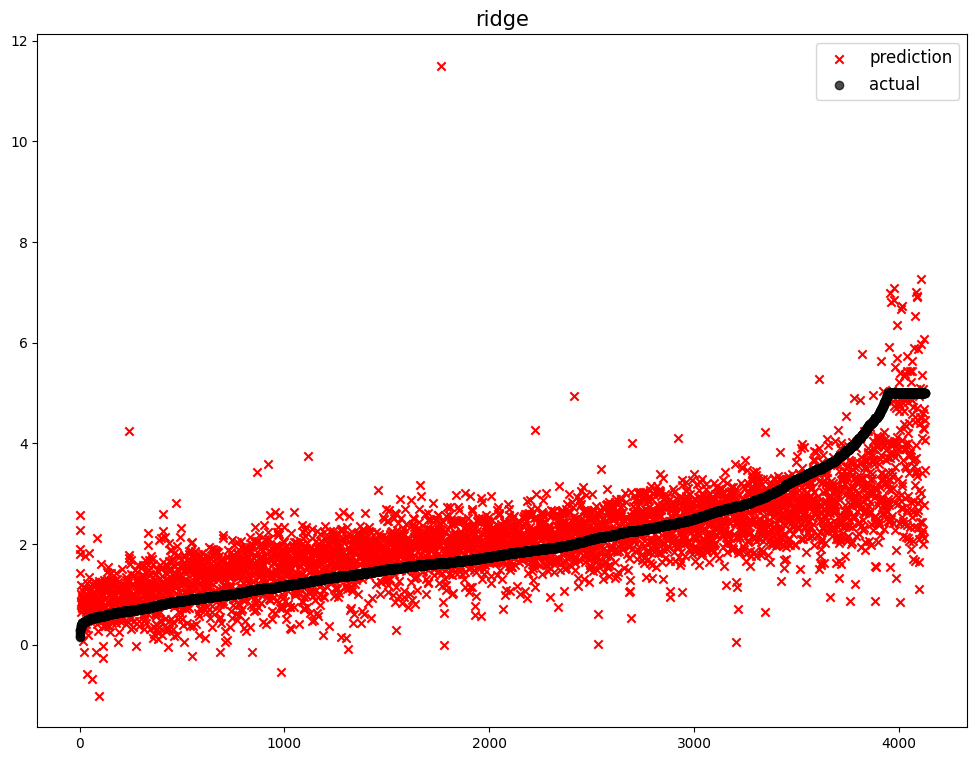

              model       mse
0  LinearRegression  0.555892
1             ridge  0.555892


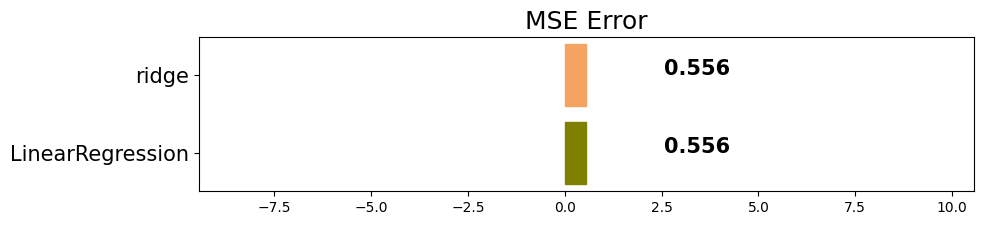

In [15]:
# 1. 모델 생성
ridge = Ridge(alpha=0.001)

# 2. 모델 학습
ridge.fit(X_train, y_train)

# 3. 모델 예측
y_pred = ridge.predict(X_test)

# 4. 모델 평가
mse_eval('ridge', y_pred, y_test)

### Lasso

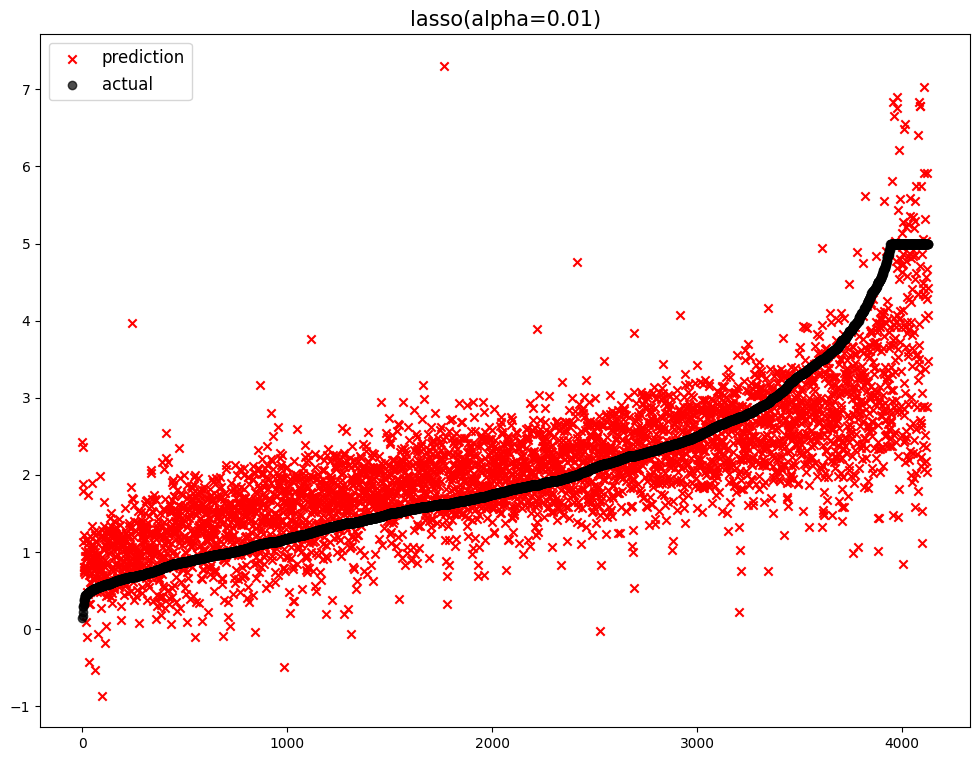

               model       mse
0   LinearRegression  0.555892
1              ridge  0.555892
2  lasso(alpha=0.01)  0.544449


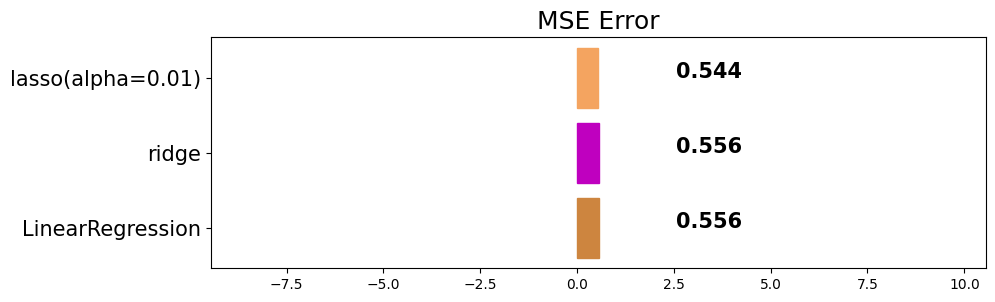

In [16]:
# 1. 모델 생성
lasso = Lasso(alpha=0.01)

# 2. 모델 학습
lasso.fit(X_train, y_train)

# 3. 모델 예측
y_pred = lasso.predict(X_test)

# 4. 모델 평가
mse_eval('lasso(alpha=0.01)', y_pred, y_test)

### ElasticNet

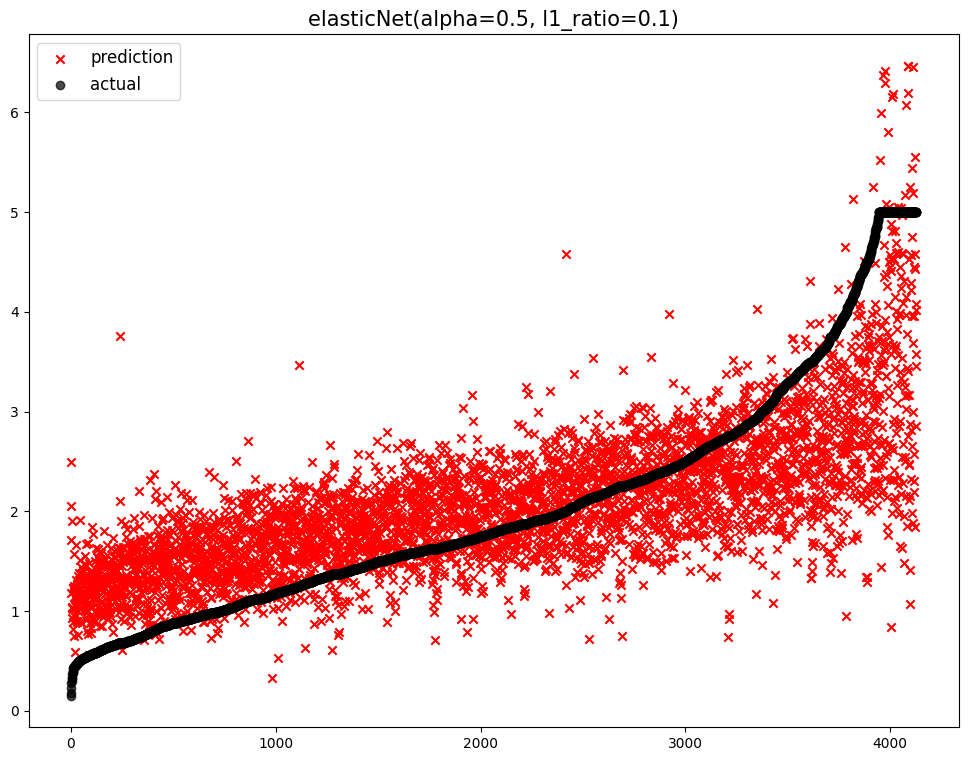

                                 model       mse
0  elasticNet(alpha=0.5, l1_ratio=0.1)  0.616577
1                     LinearRegression  0.555892
2                                ridge  0.555892
3                    lasso(alpha=0.01)  0.544449


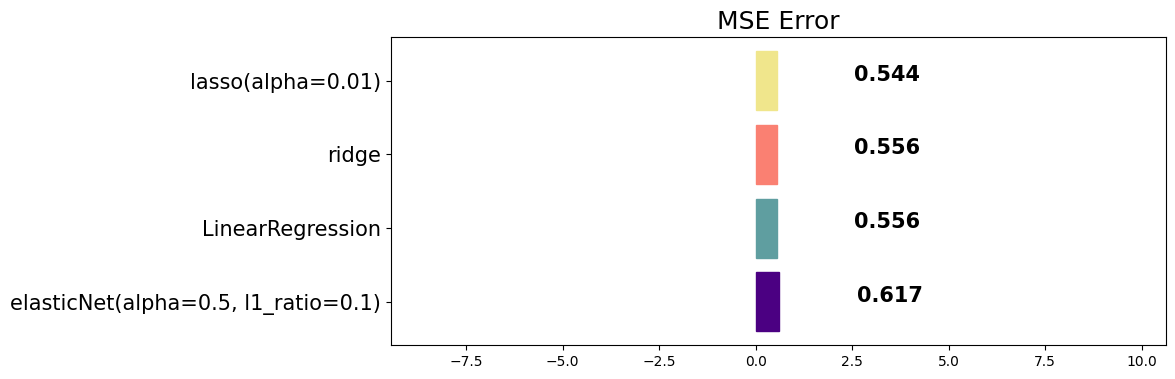

In [17]:
# 1. 모델 생성
# l1_ratio 작을수록 결과가 좋았음.
elasticNet = ElasticNet(alpha=0.5, l1_ratio=0.1)

# 2. 모델 학습
elasticNet.fit(X_train, y_train)

# 3. 모델 예측
y_pred = elasticNet.predict(X_test)

# 4. 모델 평가
mse_eval('elasticNet(alpha=0.5, l1_ratio=0.1)', y_pred, y_test)

### pipeLine

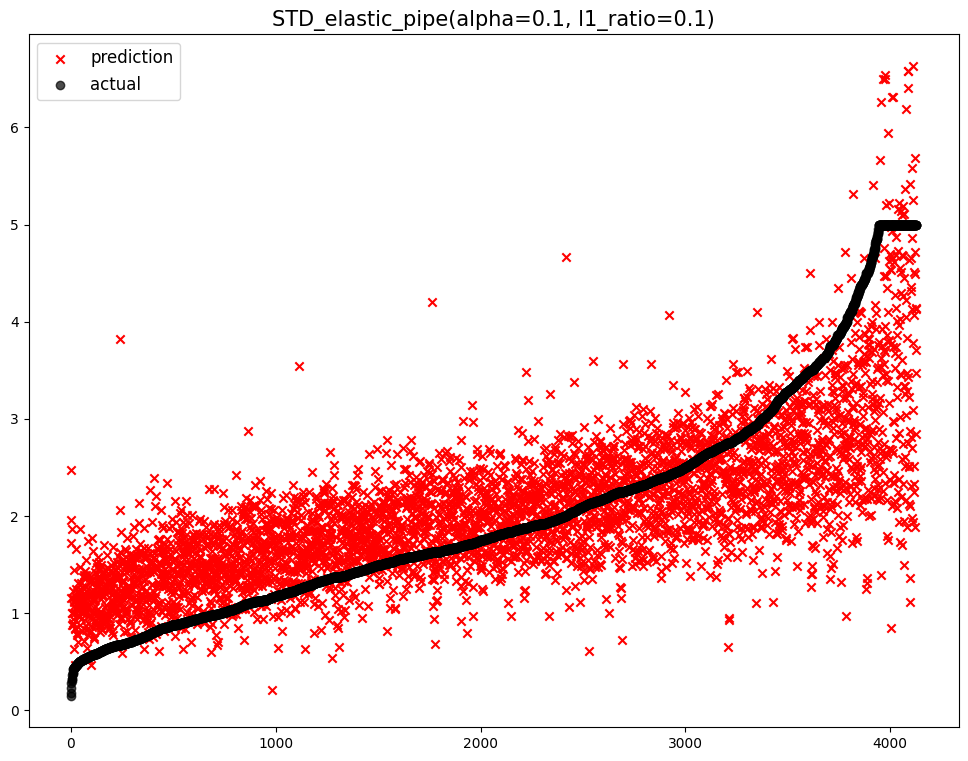

                                       model       mse
0        elasticNet(alpha=0.5, l1_ratio=0.1)  0.616577
1  STD_elastic_pipe(alpha=0.1, l1_ratio=0.1)  0.590975
2                           LinearRegression  0.555892
3                                      ridge  0.555892
4                          lasso(alpha=0.01)  0.544449


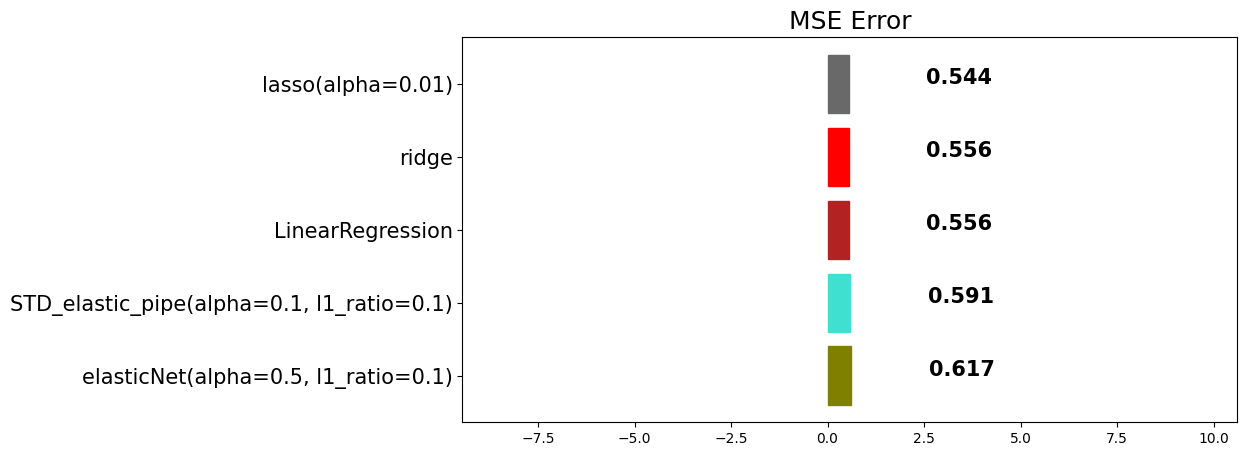

In [18]:
# 1. (파이프 라인)모델 생성
# 표준화 적용 후 엘라스틱넷. 그냥 엘라스틱넷과 얼마나 다른지 비교
elasticNet_pipeline = make_pipeline(
    StandardScaler(),
    ElasticNet(alpha=0.1, l1_ratio=0.1)
)

# 2. 모델 학습
elasticNet_pipeline.fit(X_train, y_train)

# 3. 모델 예측
y_pred = elasticNet_pipeline.predict(X_test)

# 4. 모델 평가
mse_eval('STD_elastic_pipe(alpha=0.1, l1_ratio=0.1)', y_pred, y_test)

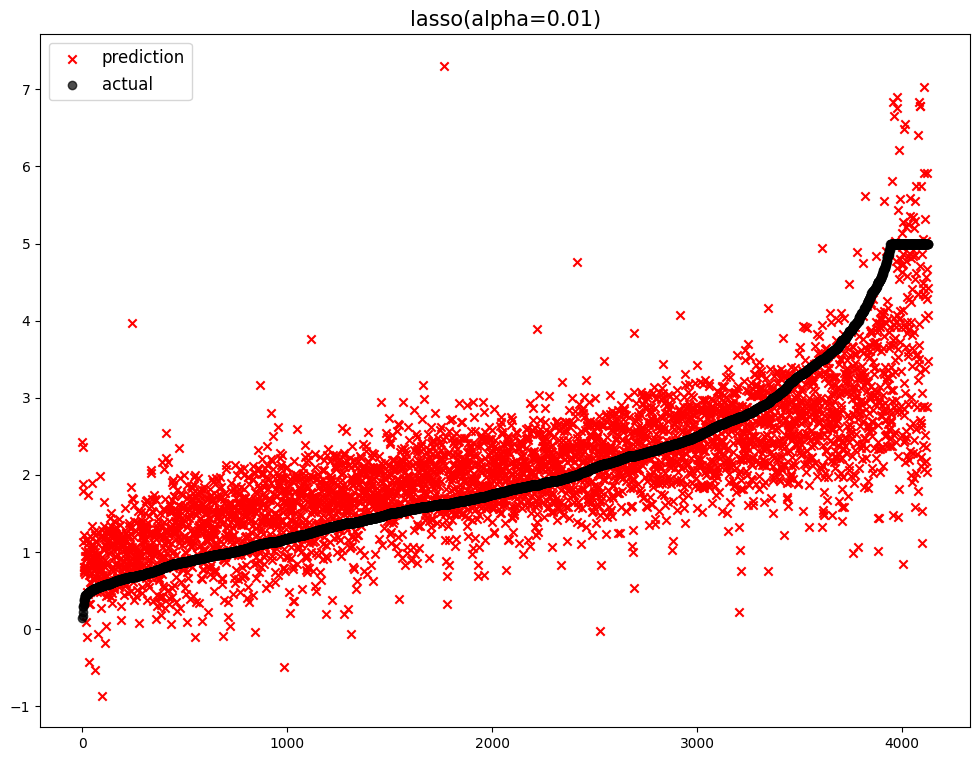

                                       model       mse
0        elasticNet(alpha=0.5, l1_ratio=0.1)  0.616577
1  STD_elastic_pipe(alpha=0.1, l1_ratio=0.1)  0.590975
2                           LinearRegression  0.555892
3                                      ridge  0.555892
4                          lasso(alpha=0.01)  0.544449


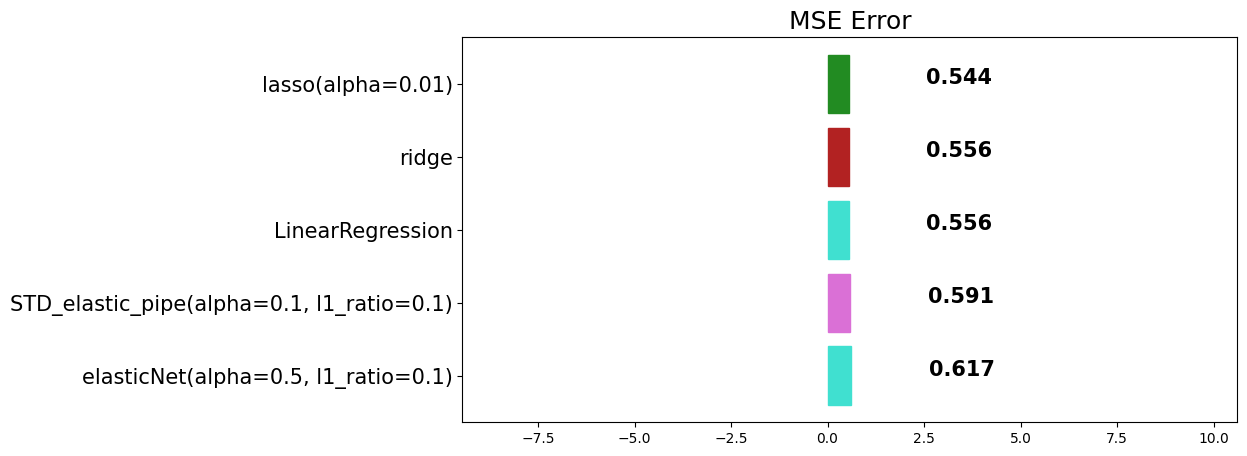

In [19]:
# lasso 0.005 해봄
# 1. 모델 생성
lasso = Lasso(alpha=0.01)

# 2. 모델 학습
lasso.fit(X_train, y_train)

# 3. 모델 예측
y_pred = lasso.predict(X_test)

# 4. 모델 평가
mse_eval('lasso(alpha=0.01)', y_pred, y_test)

## **앙상블(Ensemble) 모델**

### Voting Regressor

In [20]:
from sklearn.ensemble import  VotingRegressor

# 앞에서 학습이 완료된 모델을 가져오기
single_models = [ 
                ('lasso', lasso), 
                ('ridge', ridge),
                ('linear_reg',linear_reg),
                ('elasticNet_pipeline', elasticNet_pipeline)
]

# VotingRegressor에 앞에서 만든 모델 담고, cpu 설정
# 1. 모델 생성
voting_reg = VotingRegressor(single_models, n_jobs =-1)

# 2. 모델 학습
voting_reg.fit(X_train, y_train)


VotingRegressor(estimators=[('lasso', Lasso(alpha=0.01)),
                            ('ridge', Ridge(alpha=0.001)),
                            ('linear_reg', LinearRegression(n_jobs=-1)),
                            ('elasticNet_pipeline',
                             Pipeline(steps=[('standardscaler',
                                              StandardScaler()),
                                             ('elasticnet',
                                              ElasticNet(alpha=0.1,
                                                         l1_ratio=0.1))]))],
                n_jobs=-1)

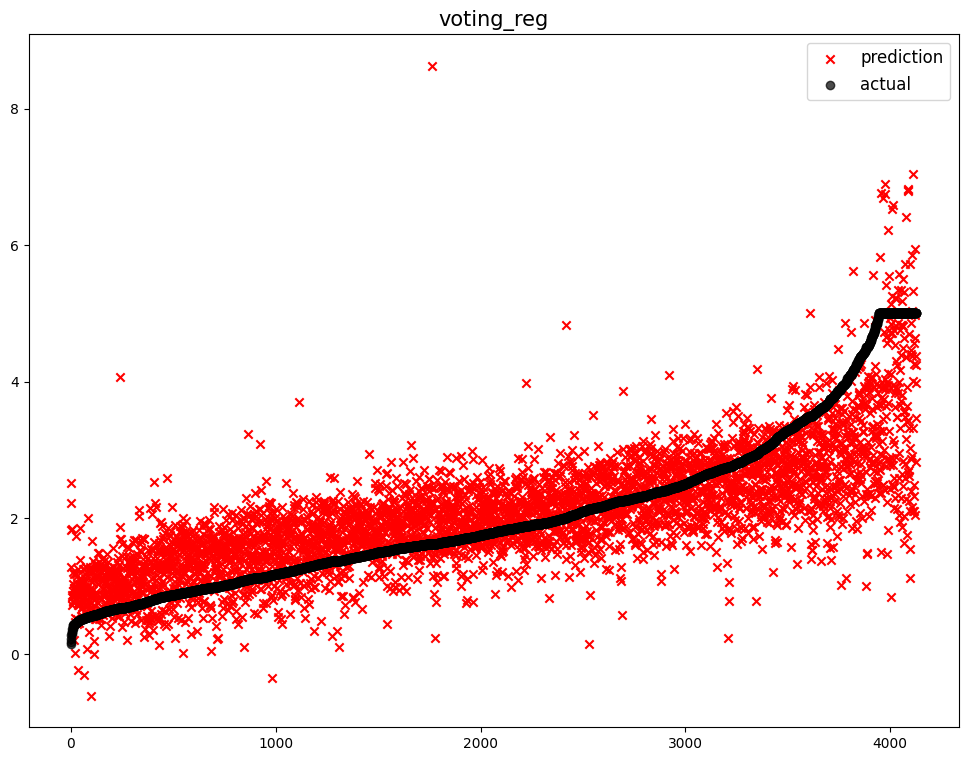

                                       model       mse
0        elasticNet(alpha=0.5, l1_ratio=0.1)  0.616577
1  STD_elastic_pipe(alpha=0.1, l1_ratio=0.1)  0.590975
2                           LinearRegression  0.555892
3                                      ridge  0.555892
4                                 voting_reg  0.548854
5                          lasso(alpha=0.01)  0.544449


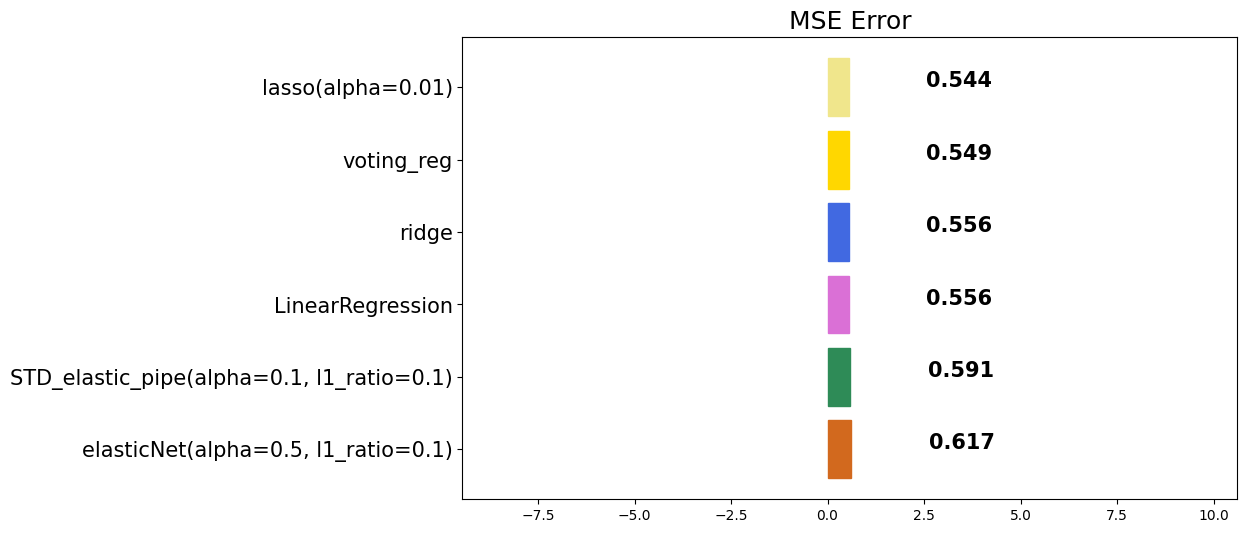

In [21]:
# 3. 모델 예측
y_pred = voting_reg.predict(X_test)

# 4. 모델 평가
mse_eval('voting_reg', y_pred, y_test)

### Bagging 방식의 ensemble

Bootstrap AGGregatING : BAGGING


#### RandomForest

In [22]:
from sklearn.ensemble import RandomForestRegressor

# 1. 모델 생성
rf_reg = RandomForestRegressor()

# 2. 모델 학습
rf_reg.fit(X_train, y_train)

RandomForestRegressor()

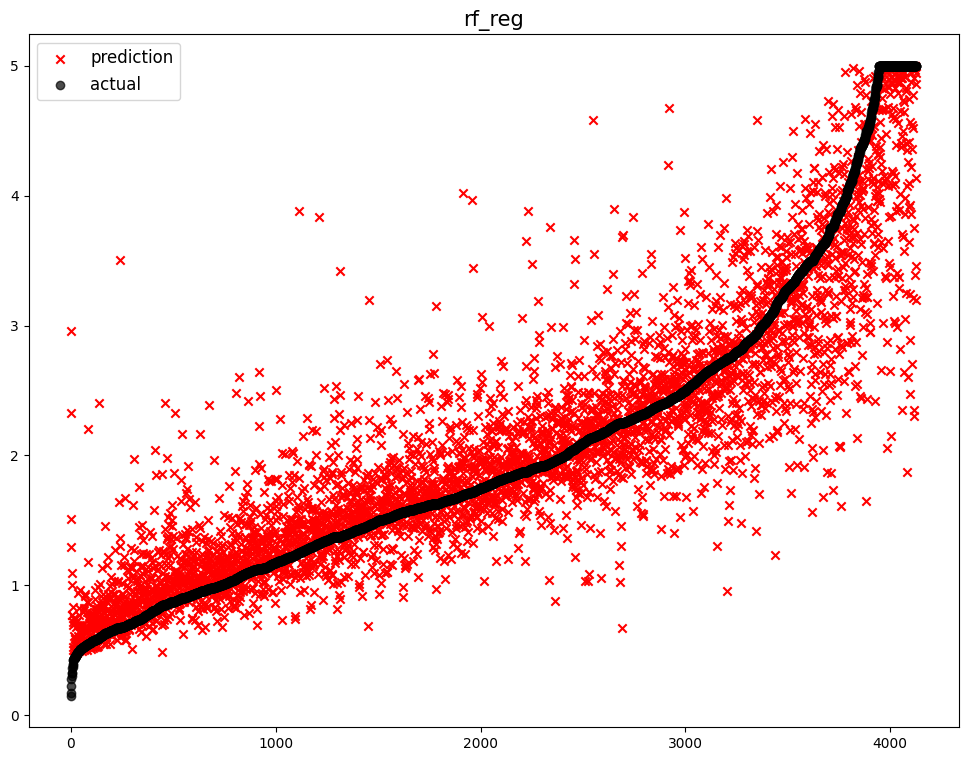

                                       model       mse
0        elasticNet(alpha=0.5, l1_ratio=0.1)  0.616577
1  STD_elastic_pipe(alpha=0.1, l1_ratio=0.1)  0.590975
2                           LinearRegression  0.555892
3                                      ridge  0.555892
4                                 voting_reg  0.548854
5                          lasso(alpha=0.01)  0.544449
6                                     rf_reg  0.252863


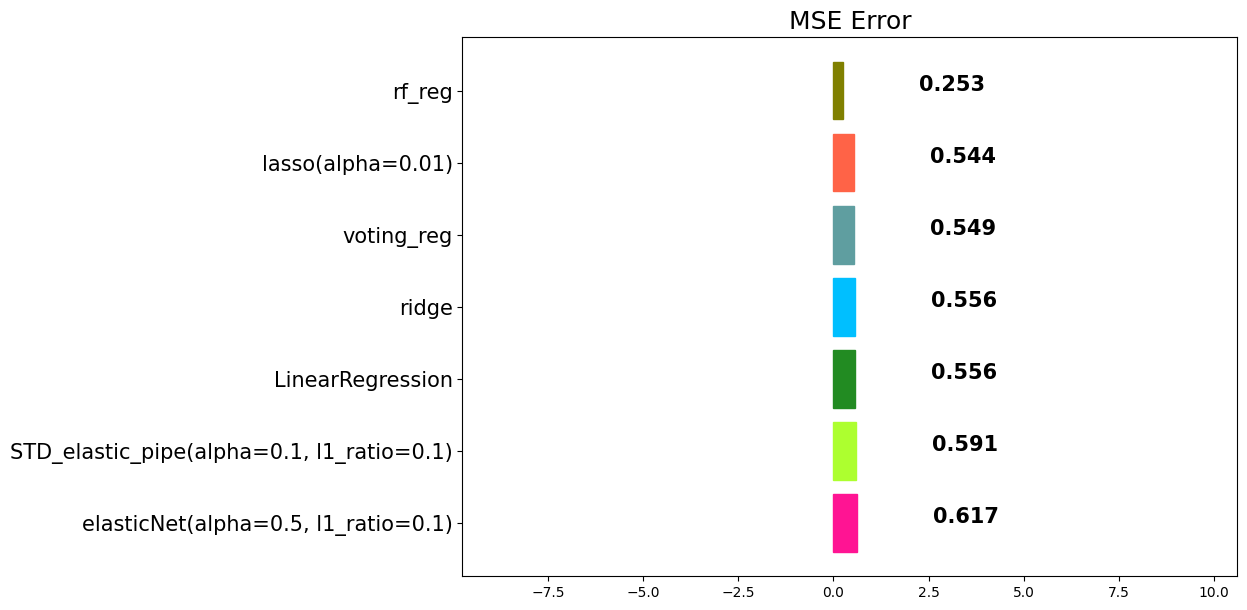

In [23]:
# 3. 모델 예측
y_pred = rf_reg.predict(X_test)

# 4. 모델 평가
mse_eval('rf_reg', y_pred, y_test)

### GridSearchCV로 RandomForestRegressor를 하이퍼파라메터 튜닝

나중에 다음과 같은 라이브러리 사용해보기를 권장
AutoML 혹은 자동으로 하이퍼파라메터 튜닝 : Optuna, H2O, Autogluon (aws)

In [ ]:
from sklearn.model_selection import GridSearchCV

# 1. RF 모델 생성
# n_jobs가 여기있는거랑 아래 모델생성에 있는거랑 어떻게 다른가??
# rf_reg_cv = RandomForestRegressor(random_state=42, n_jobs=-1)
rf_reg_cv = RandomForestRegressor(random_state=42)


# n_estimators : DT 몇개 만들거니?
param_grid = {  # 5*7=35 가지 조합 학습하고 비교
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [8, 9, 10, 11, 12, 13, None]
}

# GridSearchCV 모델 생성
grid_rg_reg = GridSearchCV(rf_reg_cv, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# 2. 모델 학습
grid_rg_reg.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [8, 9, 10, 11, 12, 13, None],
                         'n_estimators': [100, 200, 300, 400, 500]},
             scoring='neg_mean_squared_error')

In [25]:
# 5*7=35 가지 조합을 다 조회 가능 
scores_df = pd.DataFrame(grid_rg_reg.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score']]

params  mean_test_score  \
0      {'max_depth': 8, 'n_estimators': 100}        -0.328339   
1      {'max_depth': 8, 'n_estimators': 200}        -0.328343   
2      {'max_depth': 8, 'n_estimators': 300}        -0.328243   
3      {'max_depth': 8, 'n_estimators': 400}        -0.327631   
4      {'max_depth': 8, 'n_estimators': 500}        -0.327543   
5      {'max_depth': 9, 'n_estimators': 100}        -0.306408   
6      {'max_depth': 9, 'n_estimators': 200}        -0.306119   
7      {'max_depth': 9, 'n_estimators': 300}        -0.305729   
8      {'max_depth': 9, 'n_estimators': 400}        -0.305259   
9      {'max_depth': 9, 'n_estimators': 500}        -0.305154   
10    {'max_depth': 10, 'n_estimators': 100}        -0.291510   
11    {'max_depth': 10, 'n_estimators': 200}        -0.291063   
12    {'max_depth': 10, 'n_estimators': 300}        -0.290462   
13    {'max_depth': 10, 'n_estimators': 400}        -0.289842   
14    {'max_depth': 10, 'n_estimators': 500}        -0.289680   
15    {'max_depth': 11, 'n_estimators': 100}        -0.280399   
16    {'max_depth': 11, 'n_estimators': 200}        -0.279922   
17    {'max_depth': 11, 'n_estimators': 300}        -0.279477   
18    {'max_depth': 11, 'n_estimators': 400}        -0.278907   
19    {'max_depth': 11, 'n_estimators': 500}        -0.278779   
20    {'max_depth': 12, 'n_estimators': 100}        -0.273447   
21    {'max_depth': 12, 'n_estimators': 200}        -0.273095   
22    {'max_depth': 12, 'n_estimators': 300}        -0.272558   
23    {'max_depth': 12, 'n_estimators': 400}        -0.271747   
24    {'max_depth': 12, 'n_estimators': 500}        -0.271644   
25    {'max_depth': 13, 'n_estimators': 100}        -0.268869   
26    {'max_depth': 13, 'n_estimators': 200}        -0.268194   
27    {'max_depth': 13, 'n_estimators': 300}        -0.267767   
28    {'max_depth': 13, 'n_estimators': 400}        -0.267023   
29    {'max_depth': 13, 'n_estimators': 500}        -0.266786   
30  {'max_depth': None, 'n_estimators': 100}        -0.261627   
31  {'max_depth': None, 'n_estimators': 200}        -0.260678   
32  {'max_depth': None, 'n_estimators': 300}        -0.259962   
33  {'max_depth': None, 'n_estimators': 400}        -0.259095   
34  {'max_depth': None, 'n_estimators': 500}        -0.258720   

    rank_test_score  split0_test_score  split1_test_score  split2_test_score  \
0                34          -0.343203          -0.320504          -0.325229   
1                35          -0.344526          -0.321004          -0.324366   
2                33          -0.344286          -0.321347          -0.324894   
3                32          -0.342782          -0.320981          -0.323732   
4                31          -0.342302          -0.321158          -0.323244   
5                30          -0.316140          -0.303299          -0.302258   
6                29          -0.318258          -0.303433          -0.300923   
7                28          -0.318071          -0.303706          -0.300718   
8                27          -0.316970          -0.303279          -0.299992   
9                26          -0.316833          -0.303161          -0.299518   
10               25          -0.298622          -0.291920          -0.286763   
11               24          -0.300192          -0.291132          -0.286084   
12               23          -0.299946          -0.290972          -0.285428   
13               22          -0.298741          -0.290416          -0.284452   
14               21          -0.298581          -0.290290          -0.283900   
15               20          -0.284804          -0.283488          -0.275063   
16               19          -0.287042          -0.282296          -0.274594   
17               18          -0.286878          -0.282517          -0.274001   
18               17          -0.286008          -0.281913          -0.273122   
19               16          -0.285657          -0.281938          -0.272781   
20               

In [56]:
# 위는 저 내용들 다 조회. 여기는 결과만 보고싶을 때
print('GridSearch 최적 파라미터: ', grid_rg_reg.best_params_)
print('GridSearch 최고 점수: ', grid_rg_reg.best_score_)

GridSearch 최적 파라미터:  {'max_depth': None, 'n_estimators': 500}
GridSearch 최고 점수:  -0.2587203472379897


위의 셀에서 mean_test_score : cv를 5로했을 때 5개의 평균 (split 0~4 들의 평균임)
{'max_depth': None, 'n_estimators': 500} 일때 성능이 제일 좋으니까
'max_depth': None, n_estimators는 더 늘려서 성능 더 좋게 나오는지 확인 (아래)
'max_depth': None이면 과적합 발생 가능성이 있어. 그래프에서 예측값을 결과값이 많이 벗어나면 과적합 발생이다라고 생각할 수 있음.

In [57]:
#  grid_rg_reg.best_params_로 모델 가져오기

best_rg_model = grid_rg_reg.best_estimator_

In [ ]:
# 3. 모델 예측
y_pred = grid_rg_reg.predict(X_test)

# 4. 모델 평가
mse_eval('best_rg_model', y_pred, y_test)

In [59]:
from sklearn.model_selection import GridSearchCV

# 1. RF 모델 생성
rf_reg_cv = RandomForestRegressor(random_state=42)
param_grid = { # 5*7=35가지 조합 학습하고 비교
    'n_estimators': [500,600,700,800,900],
    'max_depth': [None]
    }
# GridSearchCV 모델 생성 
grid_rg_reg = GridSearchCV(rf_reg_cv, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# 2. 모델 학습
grid_rg_reg.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None],
                         'n_estimators': [500, 600, 700, 800, 900]},
             scoring='neg_mean_squared_error')

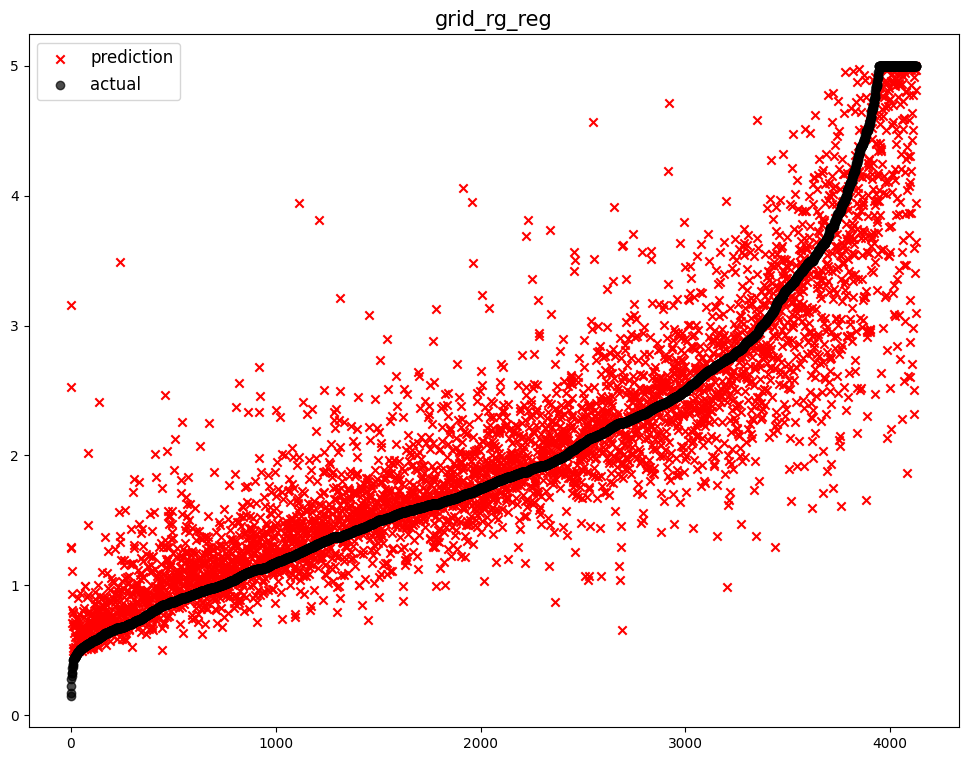

                                        model       mse
0         elasticNet(alpha=0.5, l1_ratio=0.1)  0.616577
1   STD_elastic_pipe(alpha=0.1, l1_ratio=0.1)  0.590975
2                            LinearRegression  0.555892
3                                       ridge  0.555892
4                                  voting_reg  0.548854
5                           lasso(alpha=0.01)  0.544449
6                   GradientBoostingRegressor  0.302871
7                                         gbr  0.302871
8                                      rf_reg  0.252863
9                                 grid_rg_reg  0.252164
10                                    xgb_reg  0.235182
11                                   lgbm_reg  0.214848
12                           xgb_reg_est_1000  0.211805
13                          stacking Ensemble  0.205262
14                             lgbm_reg_tuned  0.191147


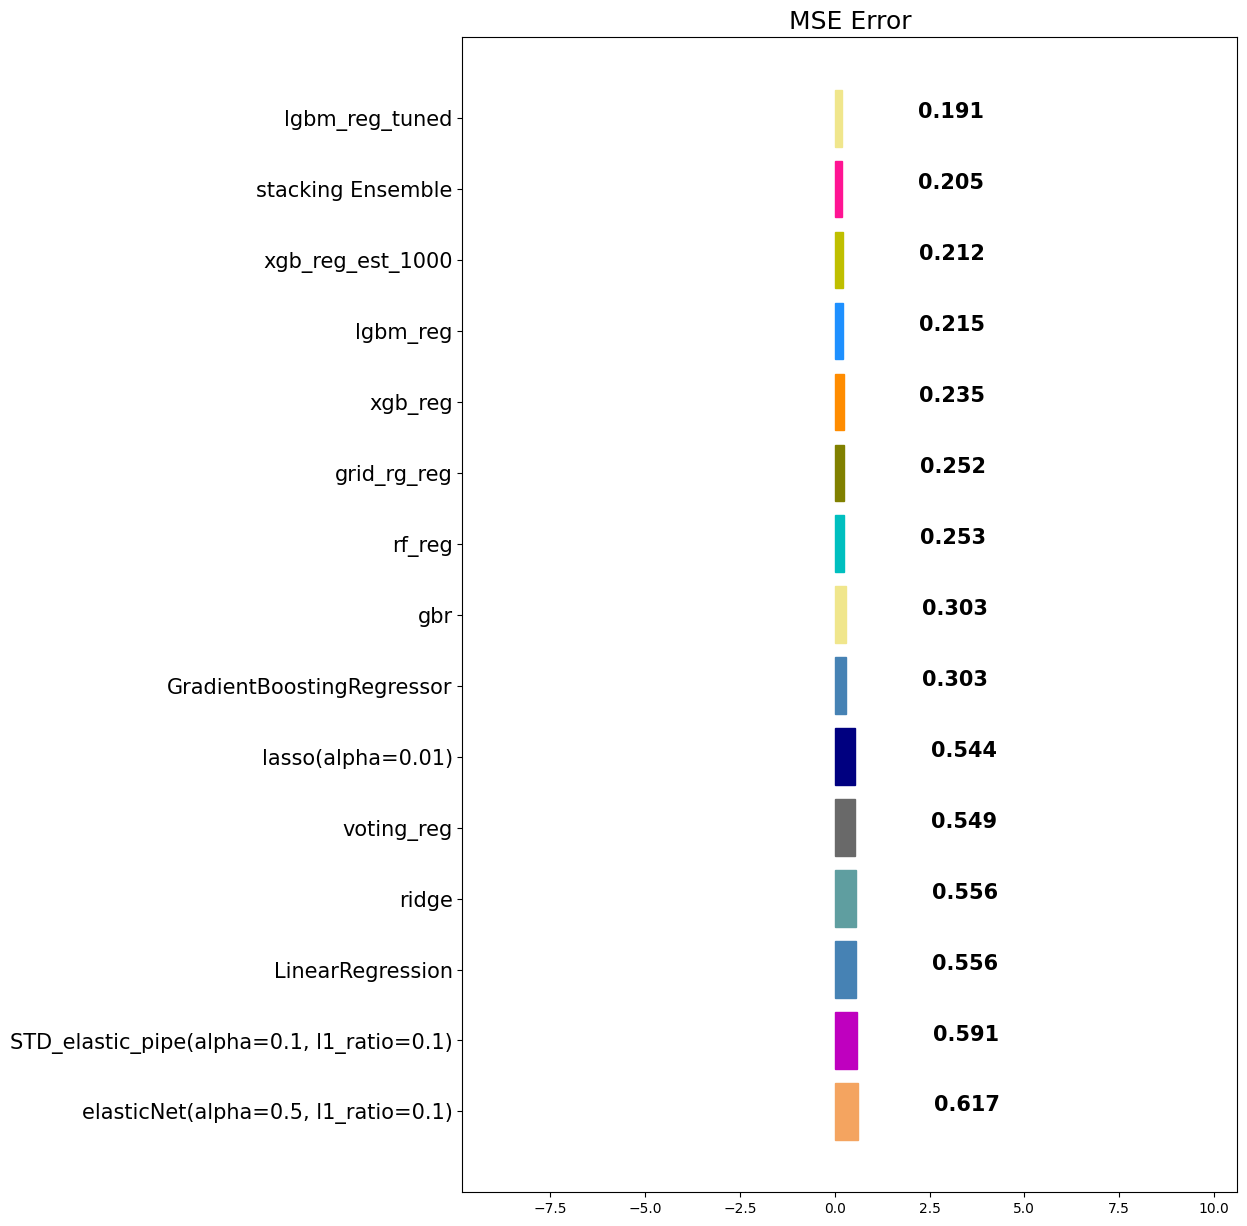

In [58]:
# 3. 모델 예측
y_pred = grid_rg_reg.predict(X_test)

# 4. 모델 평가
mse_eval('grid_rg_reg', y_pred, y_test)

### 부스팅(Boosting)
* 부스팅은 여러 개의 약한 학습기를 순차적으로 학습시켜서 최종적으로 강한 학습기를 만드는 방법.
* 장점 : 성능이 뛰어나고, 별도의 특성 선택이 필요하지 않음
* 단점 : 잘못된 레이블링이나 이상치(outlier)에 민감할 수 있다. -> 과적합(Overfitting)이 발생

GBM, AdaBoost, XGBoost, LightGBM

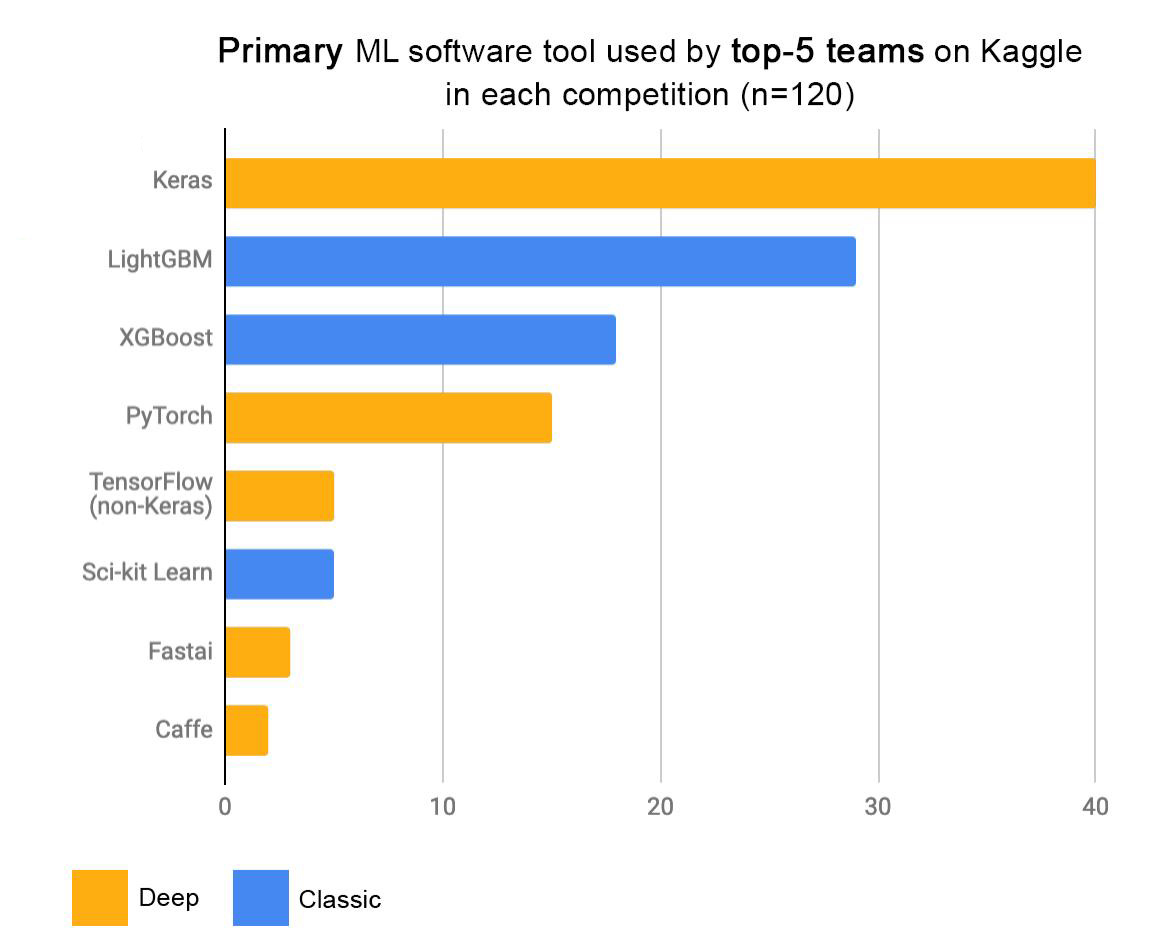

In [28]:
# 3-4년전 자료
from IPython.display import Image
Image('https://keras.io/img/graph-kaggle-1.jpeg', width=500)

### GBM

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# 1. 모델 생성
# n_estimators : 경계선 만드는 세부 모델 갯수
gbr = GradientBoostingRegressor(max_depth=2, n_estimators=200, learning_rate=0.1 ,random_state=42)

# 2. 모델 학습
gbr.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=2, n_estimators=200, random_state=42)

#### 연습용 데이터셋 생성해서 GBM 시각화

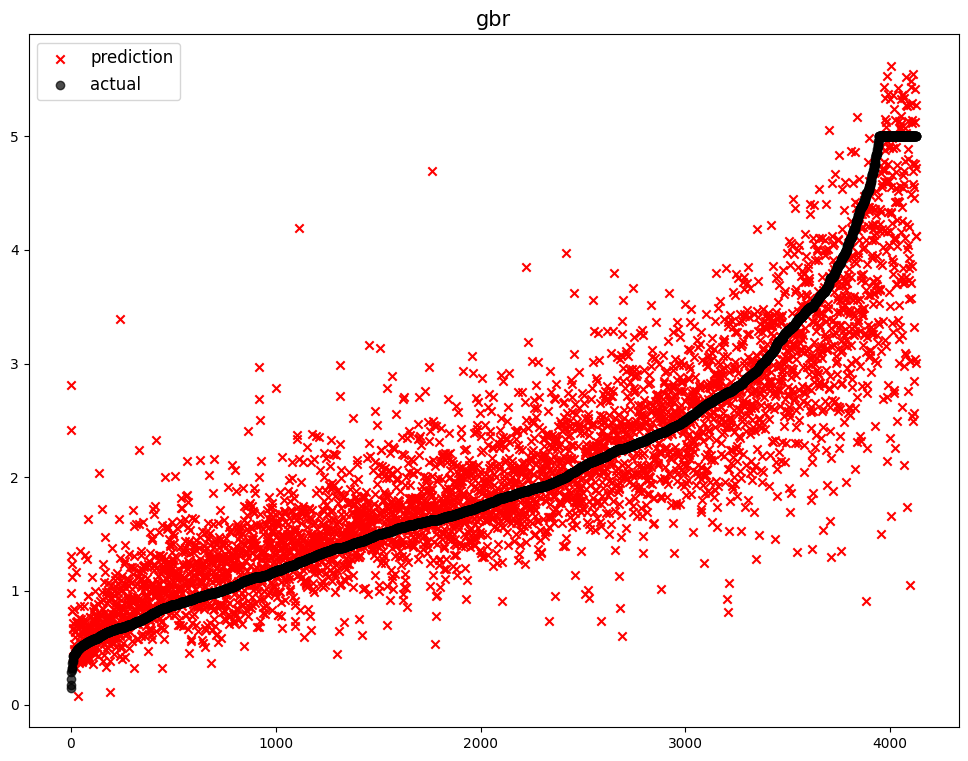

                                       model       mse
0        elasticNet(alpha=0.5, l1_ratio=0.1)  0.616577
1  STD_elastic_pipe(alpha=0.1, l1_ratio=0.1)  0.590975
2                           LinearRegression  0.555892
3                                      ridge  0.555892
4                                 voting_reg  0.548854
5                          lasso(alpha=0.01)  0.544449
6                  GradientBoostingRegressor  0.302871
7                                        gbr  0.302871
8                                     rf_reg  0.252863


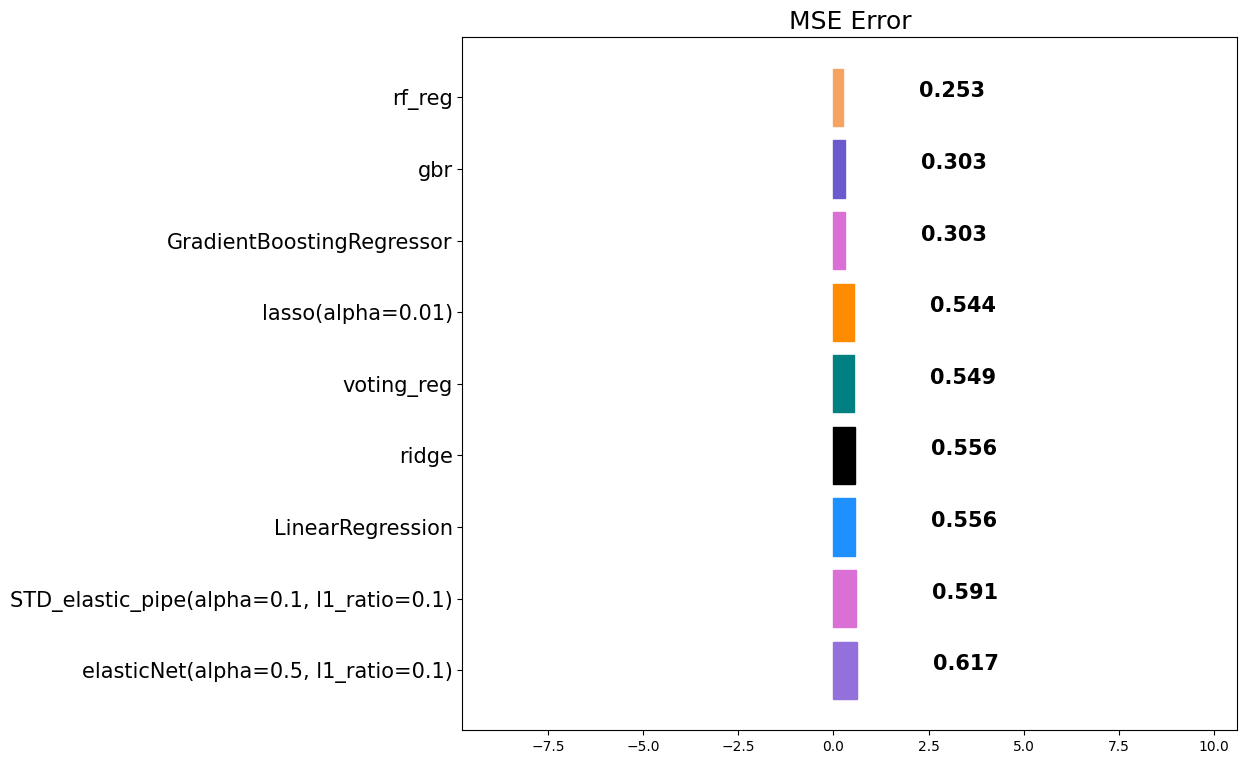

In [ ]:
# 3. 모델 예측
y_pred = gbr.predict(X_test)

# 예측값과 실제값을 비교하여 시각화
# plot_predictions('GradientBoostingRegressor', y_pred, y_test)

# mse 기준으로 모델의 성능 평가
mse_eval('gbr', y_pred, y_test)

위 부분 시각화 GBM_visualize.ipynb 파일 참고

### XGBoost

In [ ]:
# xgboost는 sklearn의 기본 알고리즘이 아니다. 별도 설치 필요.
%pip install xgboost

In [40]:
# XGBoost
from xgboost import XGBRegressor

# 1. 모델 생성
xgb_reg = XGBRegressor(random_state=42, learning_rate=0.01, max_depth=7, n_estimators=1000, subsample=0.8)

# 2. 모델 학습
xgb_reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.01, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=1000,
             n_jobs=None, num_parallel_tree=None, ...)

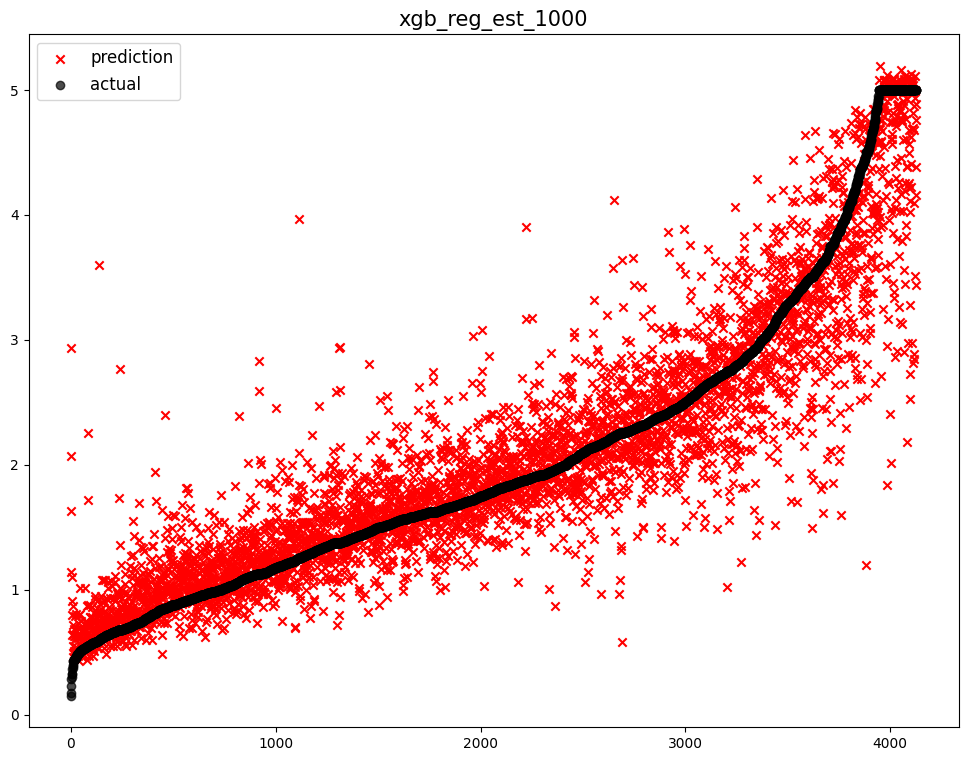

                                        model       mse
0         elasticNet(alpha=0.5, l1_ratio=0.1)  0.616577
1   STD_elastic_pipe(alpha=0.1, l1_ratio=0.1)  0.590975
2                            LinearRegression  0.555892
3                                       ridge  0.555892
4                                  voting_reg  0.548854
5                           lasso(alpha=0.01)  0.544449
6                   GradientBoostingRegressor  0.302871
7                                         gbr  0.302871
8                                      rf_reg  0.252863
9                                     xgb_reg  0.235182
10                           xgb_reg_est_1000  0.211805


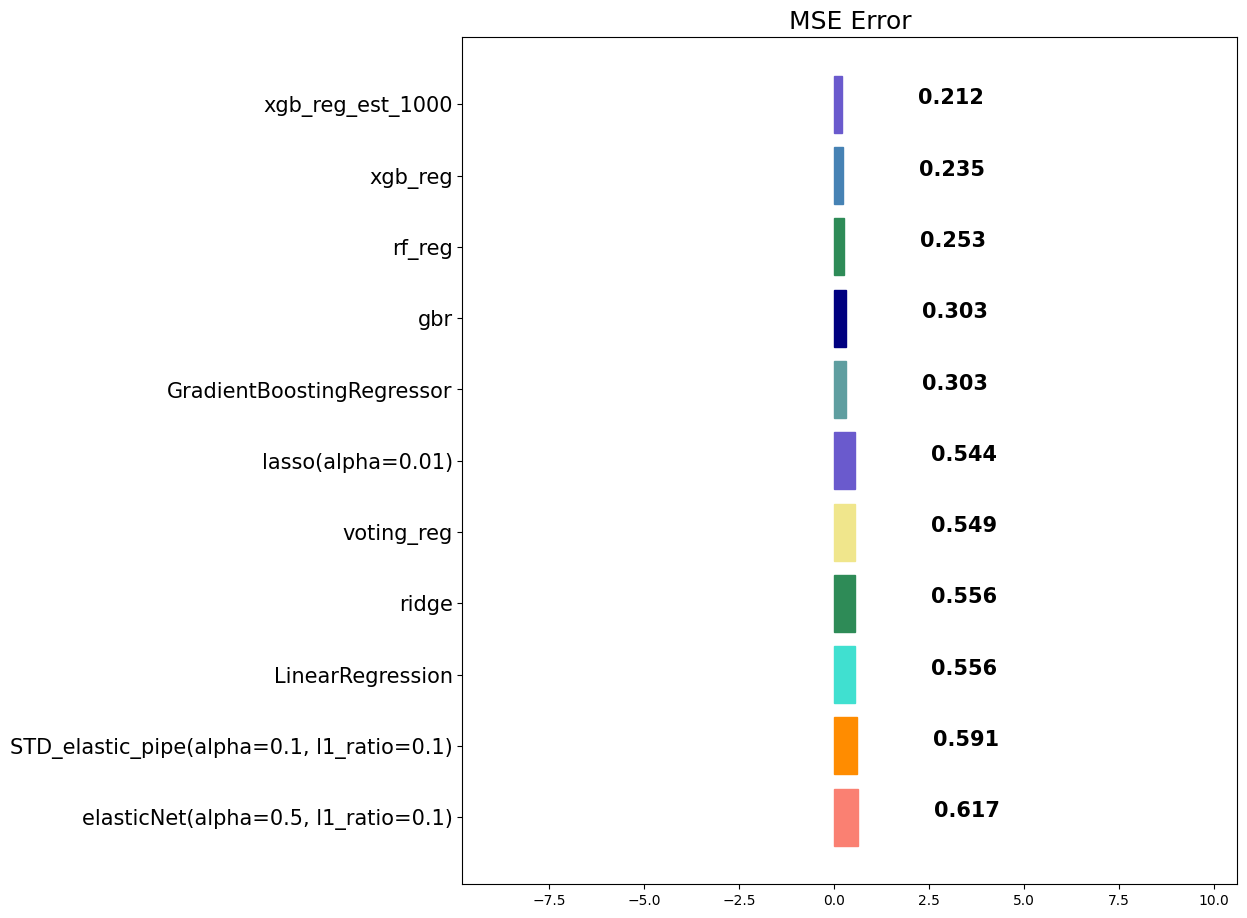

In [41]:
# 3. 모델 예측
y_pred = xgb_reg.predict(X_test)

# 4. 모델 평가
mse_eval('xgb_reg_est_1000', y_pred, y_test)

### LGBM(Light GBM) Regressor

In [ ]:
%pip install lightgbm

   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 1.5/1.5 MB 25.3 MB/s  0:00:00


In [ ]:
from lightgbm import LGBMRegressor

# 1. 모델 생성
# lgbm_reg = LGBMRegressor()

# 튜닝전보다 성능이 잘 안나와.
# lgbm_reg = LGBMRegressor(random_state=42, learning_rate=0.01, n_estimators=1000 ,colsample_bytree=0.9, max_depth=7)

lgbm_reg = LGBMRegressor(
    n_estimators=1000,
    learning_rate=0.05,
    # 아래 파라미터들을 하나씩 조정해 보세요
    num_leaves=31,            # 늘리면 더 복잡한 모델 (너무 크면 과적합 주의)
    min_child_samples=10,     # 줄이면 더 미세한 분기 가능 (기본값 20)
    min_child_weight=0.001,   # 줄이면 더 작은 단위로 분기
    verbose=-1                # 경고 메시지를 숨기고 싶을 때 사용
)


# 2. 모델 학습
lgbm_reg.fit(X_train, y_train)


LGBMRegressor(learning_rate=0.05, min_child_samples=10, n_estimators=1000,
              verbose=-1)

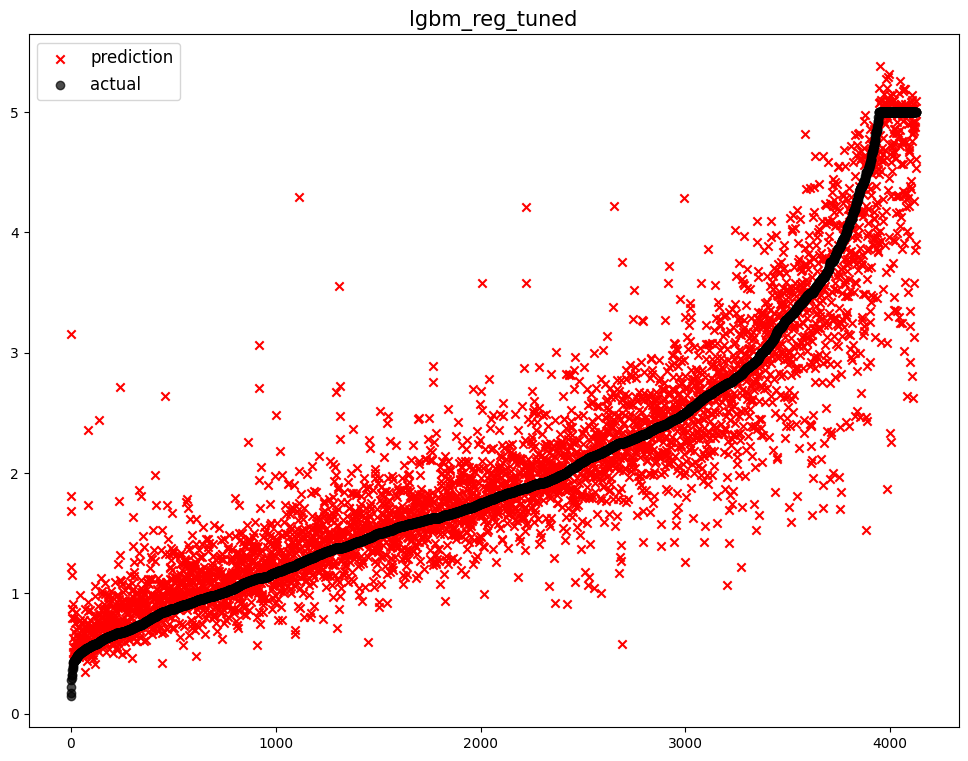

                                        model       mse
0         elasticNet(alpha=0.5, l1_ratio=0.1)  0.616577
1   STD_elastic_pipe(alpha=0.1, l1_ratio=0.1)  0.590975
2                            LinearRegression  0.555892
3                                       ridge  0.555892
4                                  voting_reg  0.548854
5                           lasso(alpha=0.01)  0.544449
6                   GradientBoostingRegressor  0.302871
7                                         gbr  0.302871
8                                      rf_reg  0.252863
9                                     xgb_reg  0.235182
10                                   lgbm_reg  0.214848
11                           xgb_reg_est_1000  0.211805
12                             lgbm_reg_tuned  0.191147


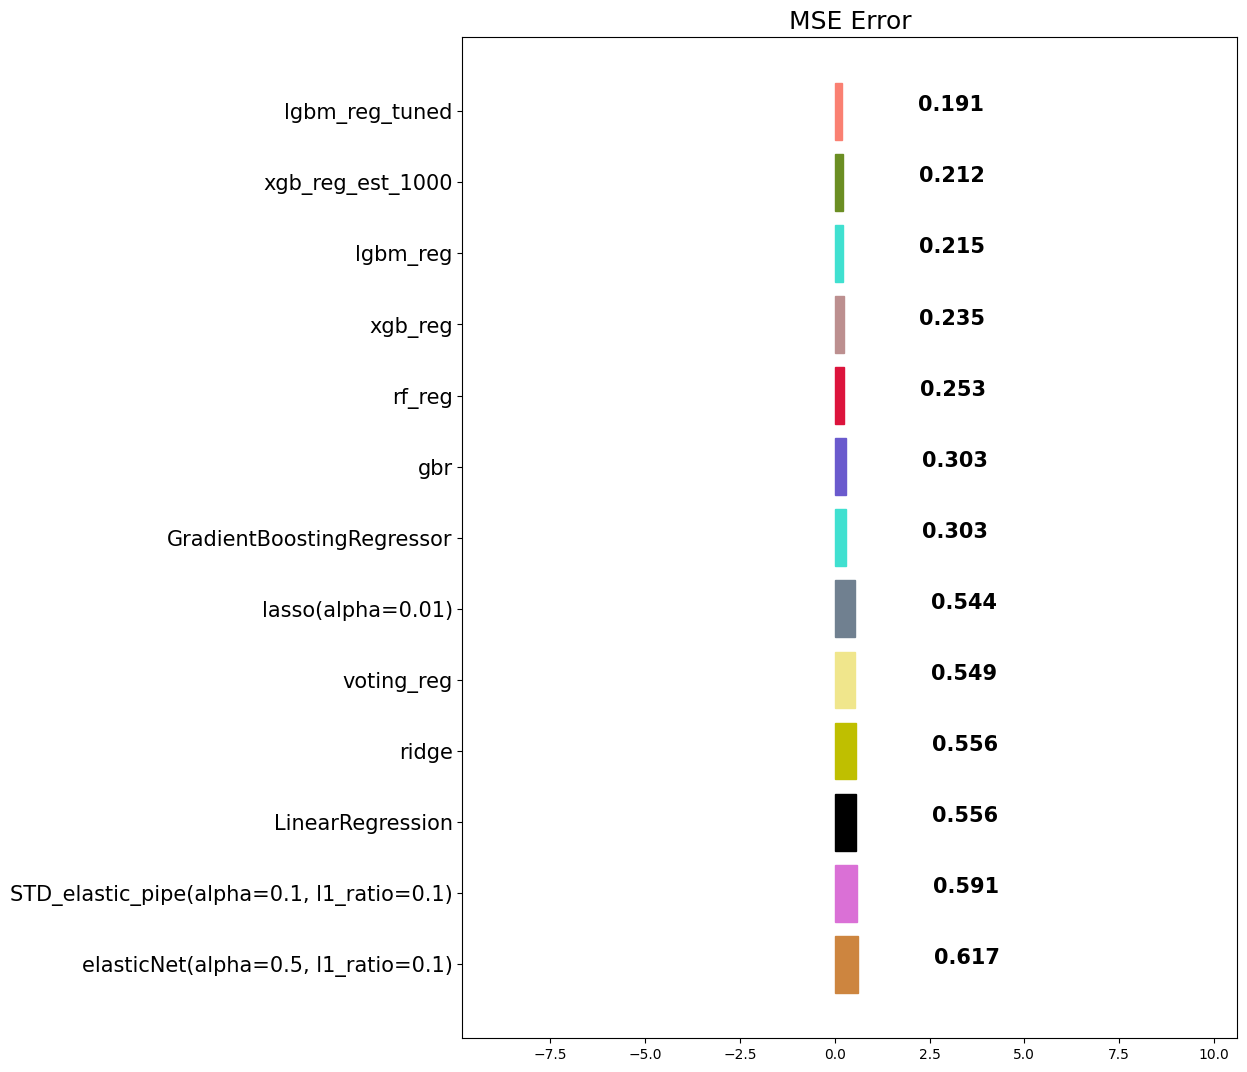

In [53]:
# 3. 모델 예측
y_pred = lgbm_reg.predict(X_test)

# 4. 모델 평가
mse_eval('lgbm_reg_tuned', y_pred, y_test)

### Stacking
* 개별 모델(전단 예측기)이 예측한 데이터를 기반으로 최종 예측기가 종합하여 예측
* 단점 : 데이터 셋이 적은 경우, 과대적합(Overfitting) 발생할 수 있음 (데이터셋이 상대적으로 커야 함)

c:\Users\user\miniconda3\envs\DS\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


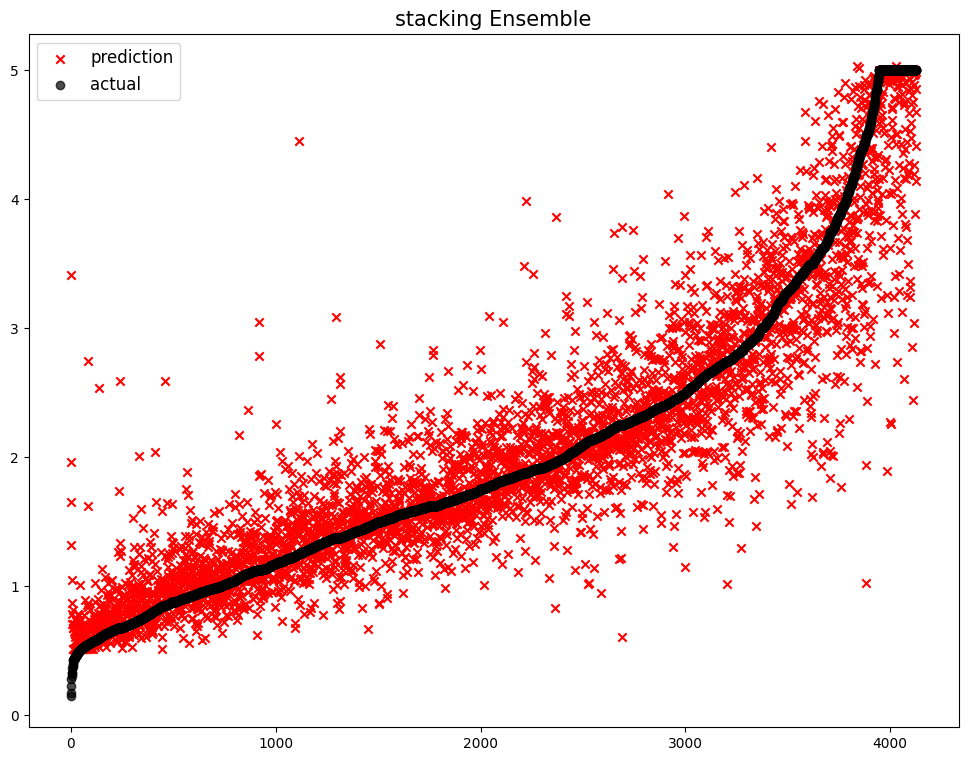

                                        model       mse
0         elasticNet(alpha=0.5, l1_ratio=0.1)  0.616577
1   STD_elastic_pipe(alpha=0.1, l1_ratio=0.1)  0.590975
2                            LinearRegression  0.555892
3                                       ridge  0.555892
4                                  voting_reg  0.548854
5                           lasso(alpha=0.01)  0.544449
6                   GradientBoostingRegressor  0.302871
7                                         gbr  0.302871
8                                      rf_reg  0.252863
9                                     xgb_reg  0.235182
10                                   lgbm_reg  0.214848
11                           xgb_reg_est_1000  0.211805
12                          stacking Ensemble  0.205262
13                             lgbm_reg_tuned  0.191147


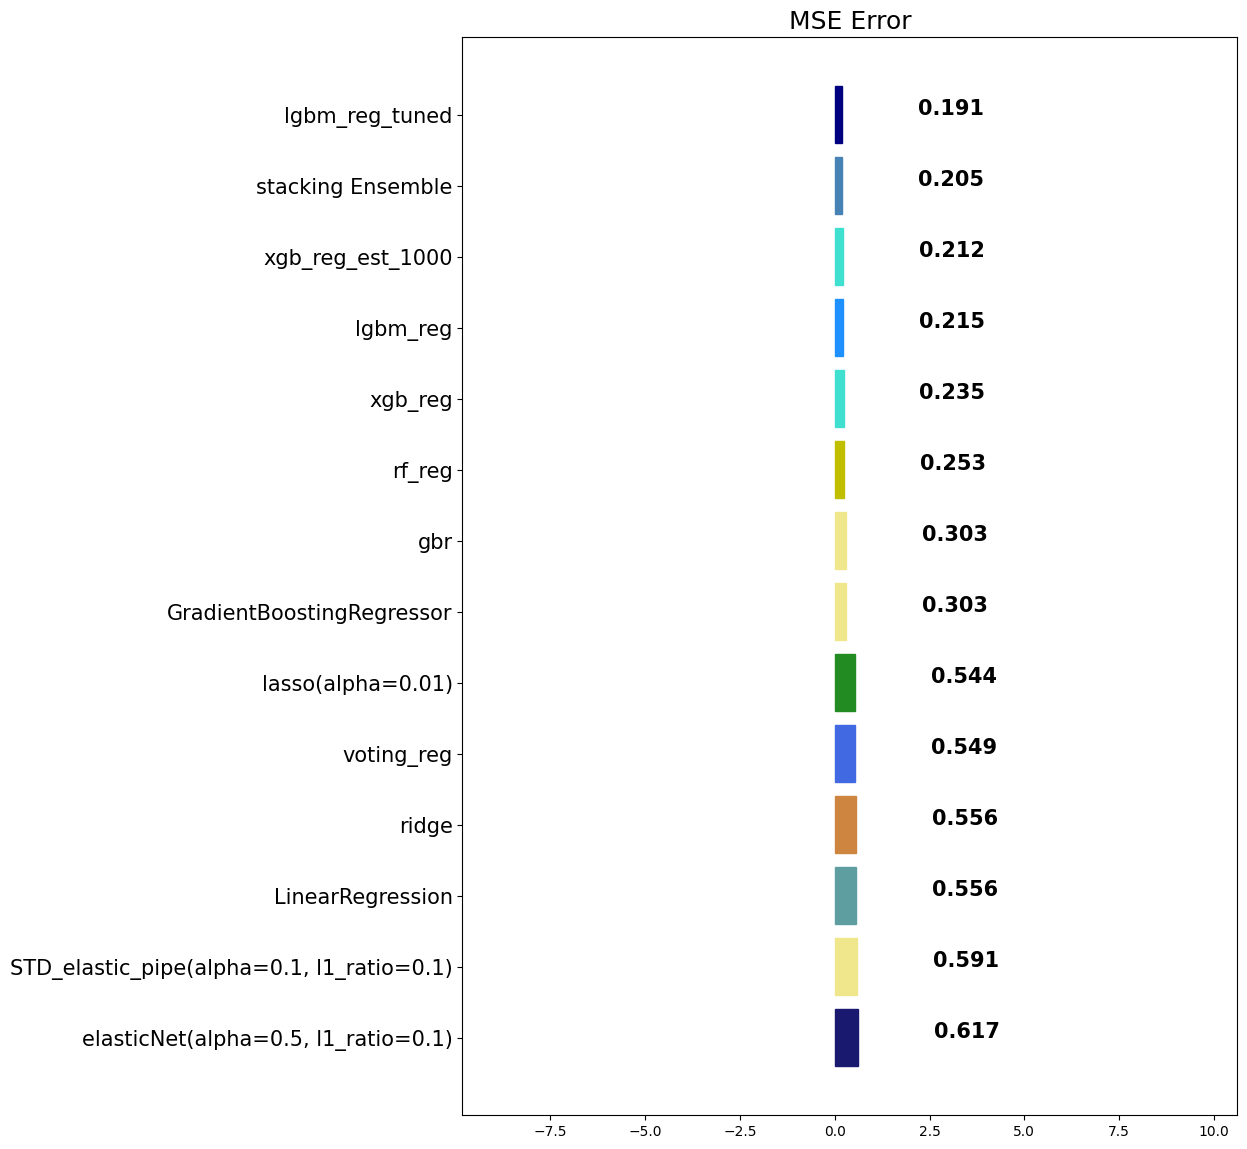

In [55]:

# Stacking Model -> 서로 다른 모델들을 개별모델(전단 예측기)로 사용할 수 있다.
from sklearn.ensemble import StackingRegressor

# lgbm_reg 자리에 LGBMRegressor() 객체생성해도 됨
stack_models=[
    ('lgbm', lgbm_reg),
    ('xgb', xgb_reg),
    ('rf', rf_reg),
    ('gbr', gbr),
]

# 1. 모델 생성
stack_reg = StackingRegressor(estimators=stack_models, final_estimator=lgbm_reg)

# 2. 모델 학습
stack_reg.fit(X_train, y_train)

# 3. 모델 예측
y_pred = stack_reg.predict(X_test)

# 4 모델 평가
mse_eval('stacking Ensemble', y_pred, y_test)